In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.7.5
scanpy      1.7.0
sinfo       0.3.1
-----
OpenSSL             19.1.0
PIL                 6.2.1
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.8.1
backcall            0.2.0
bcrypt              3.2.0
bottleneck          1.3.2
certifi             2020.12.05
cffi                1.14.3
chardet             3.0.4
cloudpickle         1.6.0
colorama            0.4.4
cryptography        3.1.1
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
idna                2.6
igraph              0.8.3
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.1
jinja2              2.11.2
joblib              0.17.0
json5               NA
jsonschema          3.2.0
jupyter_server      1.1.4
jupyterlab_server   2.0.0

In [3]:
adata = sc.datasets.visium_sge(sample_id="V1_Breast_Cancer_Block_A_Section_1")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

reading C:\Users\Onkar\UntitledFolder\data\V1_Breast_Cancer_Block_A_Section_1\filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata

AnnData object with n_obs × n_vars = 3798 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='n_genes_by_counts'>

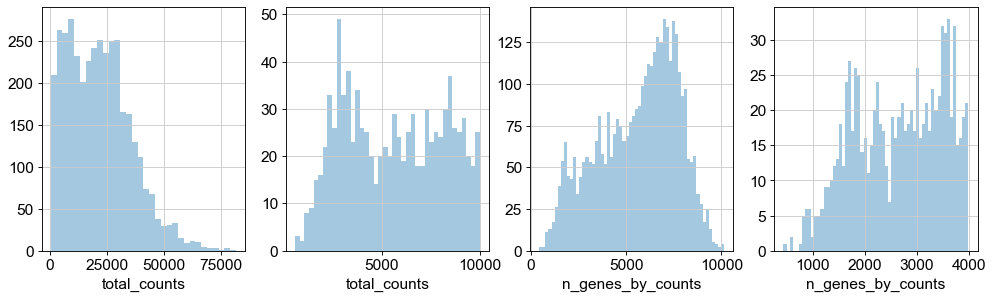

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [6]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 410 cells that have less than 5000 counts
filtered out 629 cells that have more than 35000 counts
filtered out 17700 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


#cells after MT filter: 2759


In [7]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 15 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


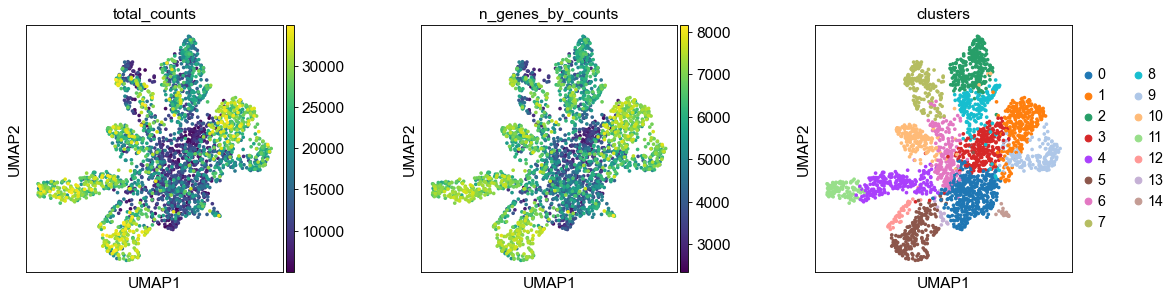

In [9]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

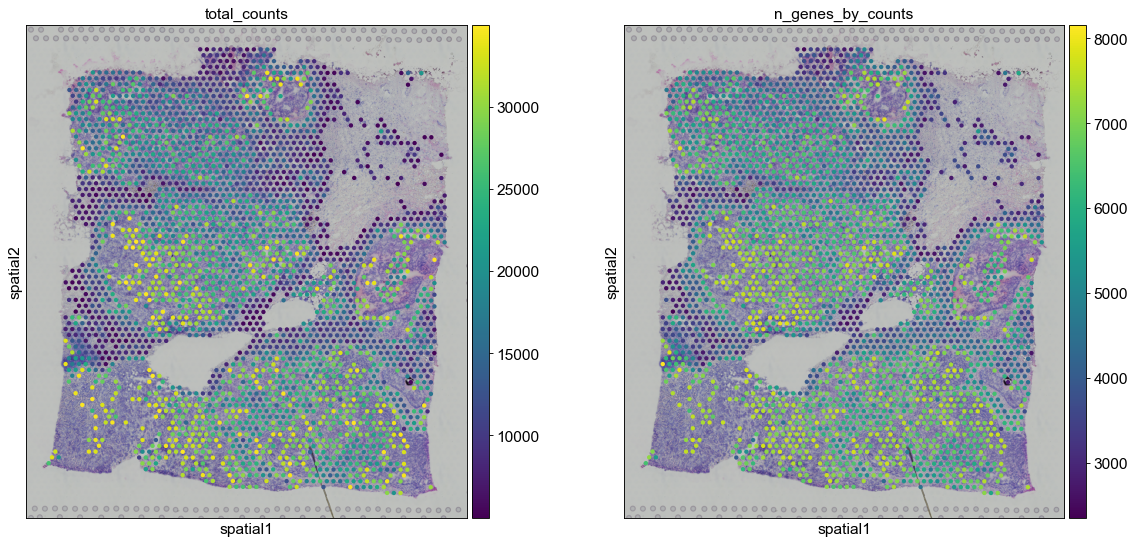

In [10]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

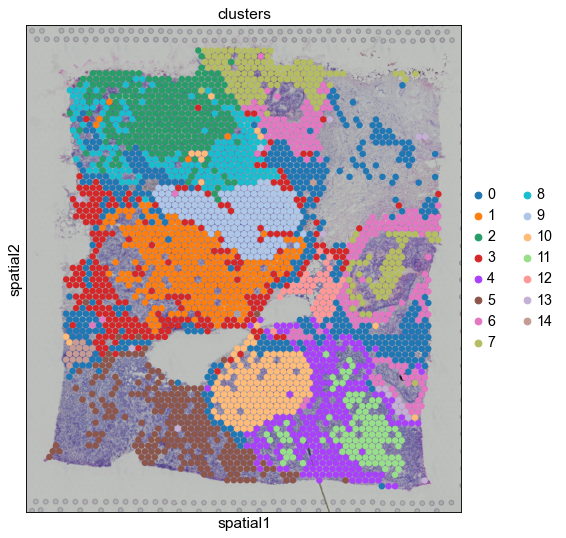

In [11]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

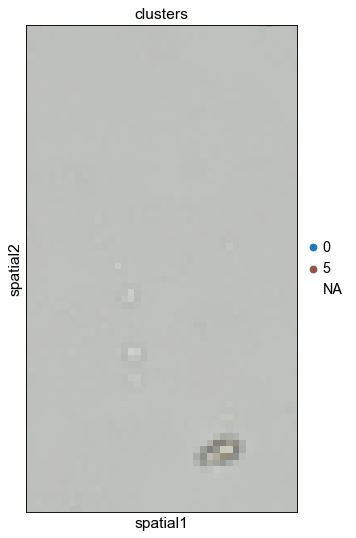

In [12]:
sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "5"], crop_coord=[1200, 1700, 1900, 1000], alpha=0.5, size=1.3)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 5


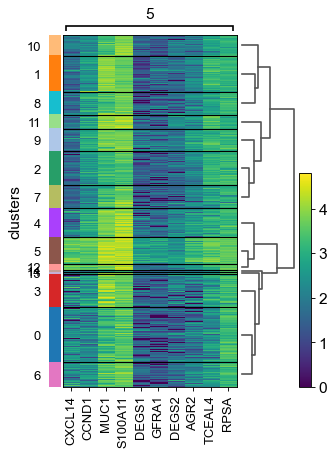

In [13]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters")

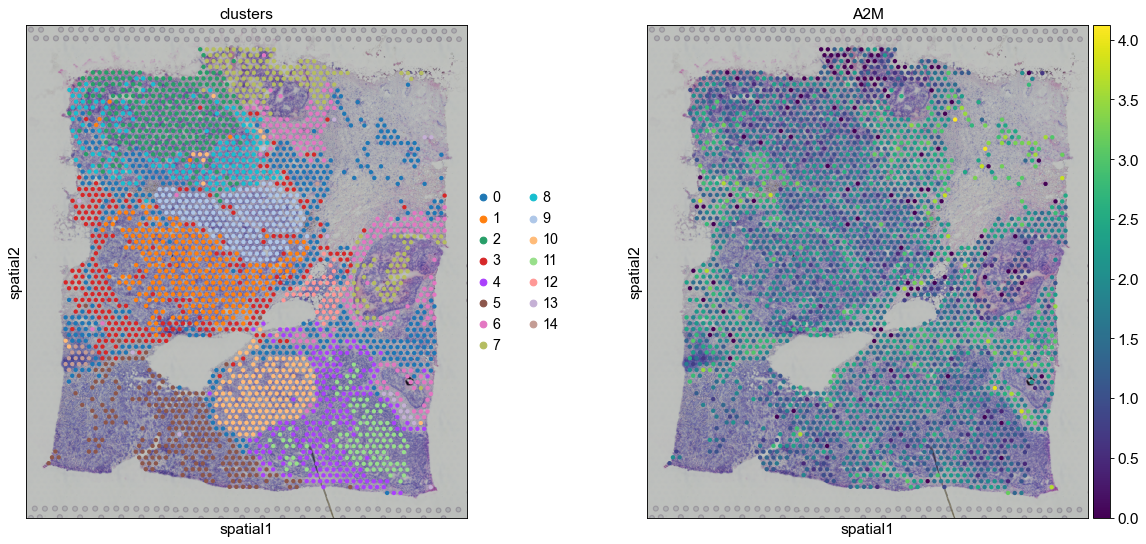

In [14]:
sc.pl.spatial(adata, img_key="hires", color=["clusters", "A2M"])

In [15]:
import SpatialDE

In [16]:
%%time
counts = pd.DataFrame(adata.X.todense(), columns=adata.var_names, index=adata.obs_names)
coord = pd.DataFrame(adata.obsm['spatial'], columns=['x_coord', 'y_coord'], index=adata.obs_names)
results = SpatialDE.run(coord, counts)

C:\Users\Onkar\anaconda3\lib\site-packages\SpatialDE\base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
Performing DE test
Pre-calculating USU^T = K's ...
C:\Users\Onkar\anaconda3\lib\site-packages\SpatialDE\base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
Done: 6.4e+01s
Fitting gene models


Finished fitting 10 models to 18901 genes



Wall time: 30min 20s


In [17]:
results.index = results["g"]
adata.var = pd.concat([adata.var, results.loc[adata.var.index.values, :]], axis=1)

In [18]:
result_high_expression=pd.DataFrame(data=results.sort_values("qval").head(1000))

... storing 'model' as categorical


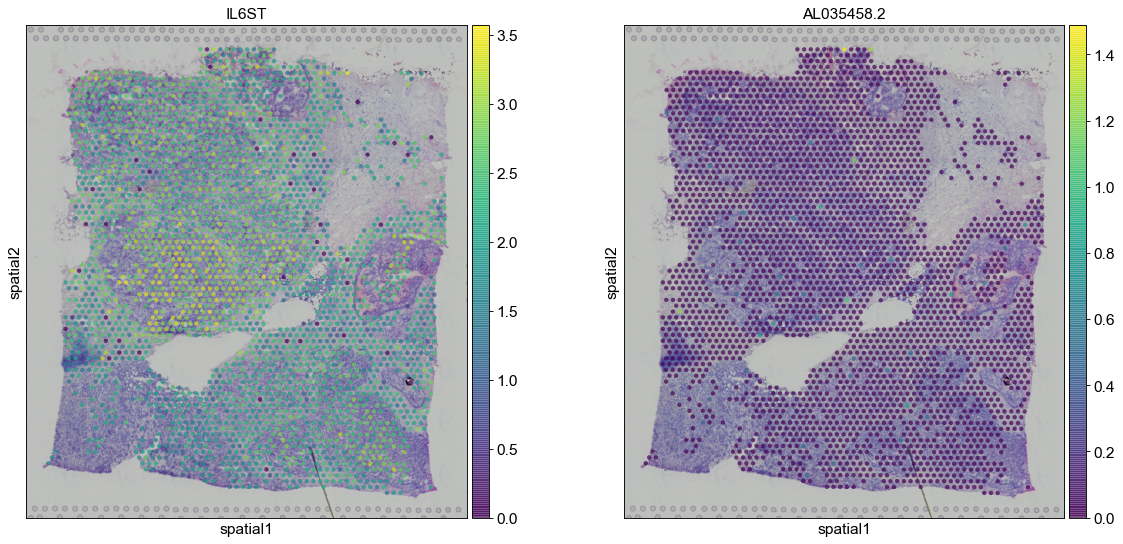

In [19]:
sc.pl.spatial(adata, img_key="hires", color=["IL6ST", "AL035458.2"], alpha=0.7)

In [20]:
import numpy as np
from numpy import load
col_Trues = load('col_Trues.npy',allow_pickle=True)
col_UMI = load('col_UMI.npy',allow_pickle=True)

intersect_col_genes_1=np.intersect1d(result_high_expression.index, col_Trues)
intersect_col_genes_2=np.intersect1d(result_high_expression.index, col_UMI)
intersect_col_genes_3=np.intersect1d(intersect_col_genes_1, intersect_col_genes_2)
print(len(intersect_col_genes_1))
print(len(intersect_col_genes_2))
print(len(intersect_col_genes_3))

395
416
387


In [ ]:
import pandas as pd
df = pd.DataFrame({"freq":[1,2,3], "count": [10,25,3], "count1": [100,250,30], "count2": [100,250,30]})
df.head()

In [ ]:
import numpy as np
binning= ['Low','Medium','High','Very_High']
df.apply(lambda x: pd.qcut(x, q=4, labels=binning))

In [ ]:
import numpy as np
df13=pd.read_csv('Pivot_gene.csv')
df13.drop(['Sno'],axis=1,inplace=True)
binning= ['Low','Medium','High','Very_High']
df13.apply(lambda x: pd.qcut(x, 4,duplicates='drop',labels=False))
df13=df13.astype('str')
#df13.replace(['0', '1', '2', '3'], ['Low','Medium','High','Very_High'])
df13.head()

In [ ]:
print(pd. __version__)

In [24]:
from numpy import save, asarray
result_high_expression=result_high_expression.index.to_numpy()
result_high_expression=asarray(result_high_expression)
save('result_high_expression.npy', result_high_expression)